In [1]:
import numpy as np
#import random
#import os
#import pandas as pd
import tensorflow as tf
#import matplotlib.pyplot as plt
#!pip install mitdeeplearning
#import mitdeeplearning as mdl
#!pip install -U mxnet-cu101==1.7.0


**Cách dùng khác của GradientTape**

In [2]:
@tf.function
def example():
  x = tf.constant([[1, 2], [3, 4]], dtype=np.float32)
  y = tf.constant([[5, 6], [7, 8]], dtype=np.float32)
  z = tf.matmul(x, y)
  return tf.gradients(z, [x, y])
example()

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[11., 15.],
        [11., 15.]], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[4., 4.],
        [6., 6.]], dtype=float32)>]

In [3]:
@tf.function
def example():
  a = tf.constant(0.)
  b = 2 * a
  return tf.gradients(a + b, [a, b], stop_gradients=[a, b])
example()

[<tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>]

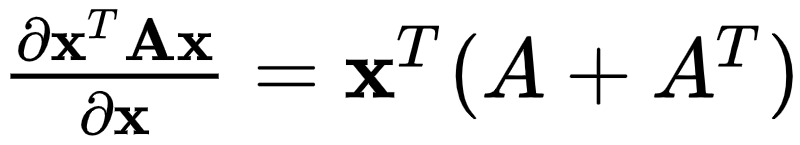

In [4]:
W = tf.constant([[1.0, 2.0, 3.0], [-1.0, 3.0, 2.0], [2.0, 3.0, 1.0]], dtype=np.float32)
A = tf.constant([[1.0, 2.0, 3.0], [-1.0, 3.0, 2.0], [2.0, 3.0, 1.0]], dtype=np.float32)
x = tf.constant([[4.0], [5.0], [6.0]], dtype=np.float32)
with tf.GradientTape(persistent=True) as g:
  g.watch(W)
  g.watch(x)
  y = tf.matmul(tf.matmul(tf.transpose(x), A), x)
Gradient_x = g.gradient(y, x)


In [5]:
Gradient_x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[43.],
       [64.],
       [57.]], dtype=float32)>

In [6]:
tf.matmul(tf.transpose(x), (tf.transpose(A) + A))

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[43., 64., 57.]], dtype=float32)>